# Percentage Iris Closure

##### Importing Libraries

In [1]:
import mediapipe as mp
import cv2
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

##### Drawing Tools

In [2]:
# For drawing on images
mp_drawing = mp.solutions.drawing_utils

# Drawing styles
mp_drawing_styles = mp.solutions.drawing_styles

# Drawing specifications
drawSpec= mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color = (0, 0, 255))

# Face mesh solution
mp_face_mesh = mp.solutions.face_mesh

##### Open Eye Image

In [3]:
image_path = r".\om\8.jpeg"

##### Initializing Model

In [4]:
model = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
)

In [5]:
# Reading Image
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

In [6]:
# Getting landmarks from model
results = model.process(image)

In [7]:
# Creating annotated image
annotated_image1 = image.copy()

##### Drawing Iris, Eyes & Lips on annotated image

In [8]:
face_landmarks = results.multi_face_landmarks[0]
# lips
mp_drawing.draw_landmarks(
  image=annotated_image1,
  landmark_list=face_landmarks,
  connections=mp_face_mesh.FACEMESH_LIPS,
  landmark_drawing_spec=None,
  connection_drawing_spec=mp_drawing_styles
  .get_default_face_mesh_contours_style())

# iris
mp_drawing.draw_landmarks(
  image=annotated_image1,
  landmark_list=face_landmarks,
  connections=mp_face_mesh.FACEMESH_IRISES,
  landmark_drawing_spec=None,
  connection_drawing_spec=mp_drawing_styles
  .get_default_face_mesh_iris_connections_style())

# left eye
mp_drawing.draw_landmarks(
  image=annotated_image1,
  landmark_list=face_landmarks,
  connections=mp_face_mesh.FACEMESH_LEFT_EYE,
  landmark_drawing_spec=None,
  connection_drawing_spec=mp_drawing_styles
  .get_default_face_mesh_contours_style())

# right eye
mp_drawing.draw_landmarks(
  image=annotated_image1,
  landmark_list=face_landmarks,
  connections=mp_face_mesh.FACEMESH_RIGHT_EYE,
  landmark_drawing_spec=None,
  connection_drawing_spec=mp_drawing_styles
  .get_default_face_mesh_contours_style())

##### Orignal Image, Annotated Image

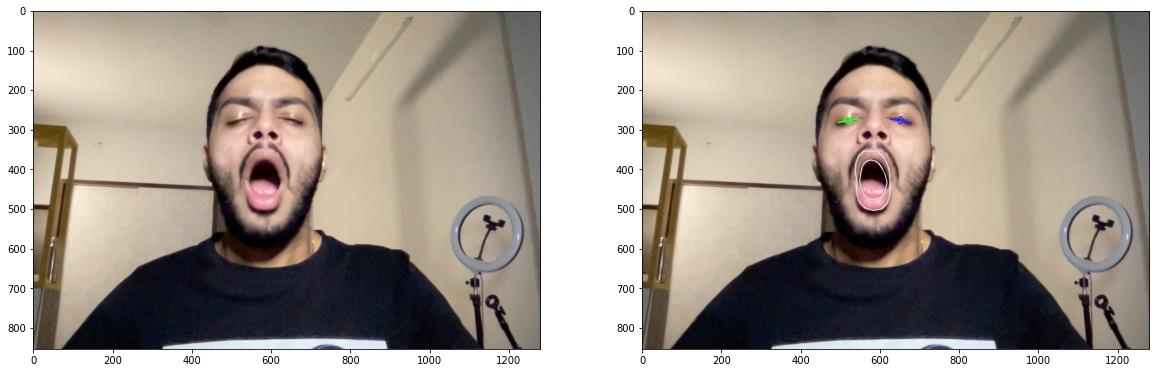

In [9]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(cv2.flip(image,1))
ax2.imshow(cv2.flip(annotated_image1,1))

##### Drawing 3D plots for Lips, Eyes, Iris

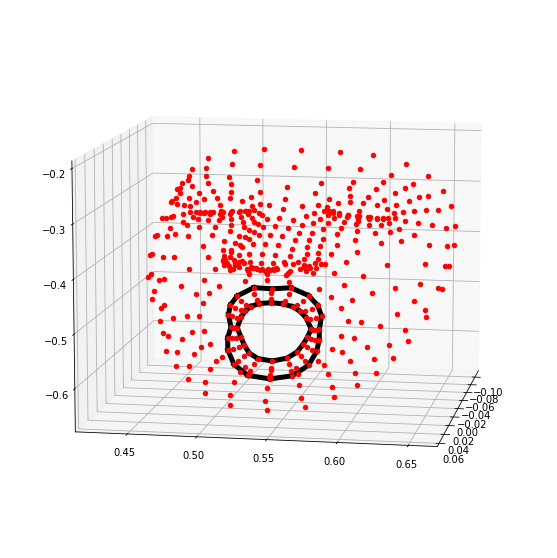

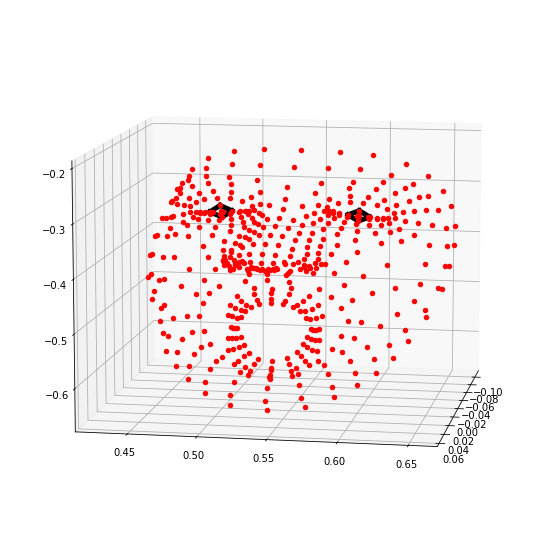

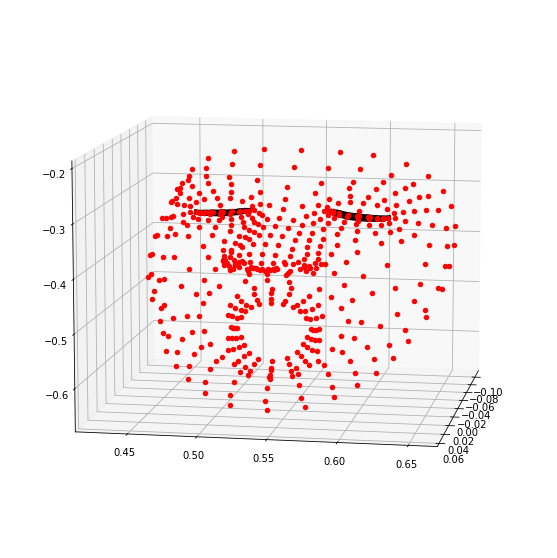

In [10]:
face_landmarks = results.multi_face_landmarks[0]
# lips
mp_drawing.plot_landmarks(
  landmark_list=face_landmarks,
  landmark_drawing_spec=drawSpec,
  connections=mp_face_mesh.FACEMESH_LIPS
)

# iris
mp_drawing.plot_landmarks(
  landmark_list=face_landmarks,
  landmark_drawing_spec=drawSpec,
  connections=mp_face_mesh.FACEMESH_IRISES
)

# eyes
mp_drawing.plot_landmarks(
  landmark_list=face_landmarks,
  landmark_drawing_spec=drawSpec,
  connections=mp_face_mesh.FACEMESH_LEFT_EYE.union(mp_face_mesh.FACEMESH_RIGHT_EYE)
)

In [11]:
points = results.multi_face_landmarks[0].landmark
print(len(points))

478


##### 478 Indices Map

![img](./images/478_indices.jpeg)

In [12]:
rIrisIdx = [469, 470, 471, 472]
lIrisIdx = [474, 475, 476, 477]
rEyeIdx = [33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161, 246]
lEyeIdx = [263, 249, 390, 373, 374, 380, 381, 382, 362, 398, 384, 385, 386, 387, 388, 466, 263]

In [13]:
rIrisCord = [(-points[idx].z, points[idx].x, -points[idx].y) for idx in rIrisIdx]
lIrisCord = [(-points[idx].z, points[idx].x, -points[idx].y) for idx in lIrisIdx]
rEyeCord = [(-points[idx].z, points[idx].x, -points[idx].y) for idx in rEyeIdx]
lEyeCord = [(-points[idx].z, points[idx].x, -points[idx].y) for idx in lEyeIdx]

##### Plotting Iris in 3D

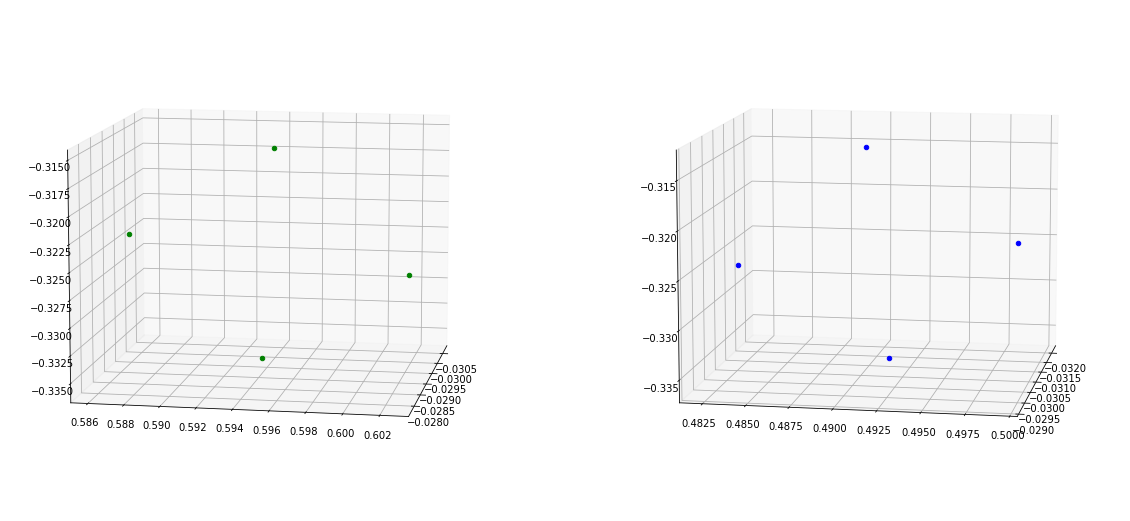

In [14]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.view_init(elev=10, azim=10)
ax2 = plt.subplot(1,2,2,projection='3d')
ax2.view_init(elev=10, azim=10)

# Left iris plot
for p in lIrisCord:
    ax1.scatter3D(xs=[p[0]], ys=[p[1]], zs=[p[2]], color="green")
    
# Right iris plot
for p in rIrisCord:
    ax2.scatter3D(xs=[p[0]], ys=[p[1]], zs=[p[2]], color="blue")

##### Calculating Normal

![img](./images/normal.png)

In [15]:
def getNormal(points):
    b = np.array(points[0])
    r = np.array(points[1])
    s = np.array(points[2])
    qr = r - b
    qs = s - b
    normal = np.cross(qr,qs)
    normal = normal / sum(normal**2)**0.5
    return normal

In [16]:
rIrisNor = getNormal(rIrisCord)
lIrisNor = getNormal(lIrisCord)
print(rIrisNor, lIrisNor)

[1. 0. 0.] [1. 0. 0.]


##### PLotting Iris with normal (in Side View and Normal View)

In [17]:
def plotNormal(points,normal,ax):
    mid = (
        (points[0][0] + points[2][0])/2,
        (points[0][1] + points[2][1])/2,
        (points[0][2] + points[2][2])/2,
    )
    
    dist = 1
    cordNormal = (
        mid[0]+normal[0]*dist,
        mid[1]+normal[1]*dist,
        mid[2]+normal[2]*dist,
    )
    
    for p in points:
        ax.scatter3D(xs=[p[0]], ys=[p[1]], zs=[p[2]])
        
    ax.plot3D(
        xs=[mid[0],cordNormal[0]],
        ys=[mid[1],cordNormal[1]],
        zs=[mid[2],cordNormal[2]],
    )

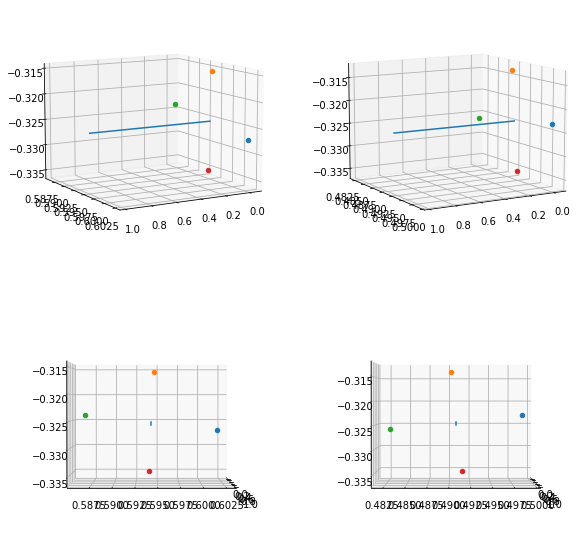

In [18]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(2,2,1, projection='3d')
ax1.view_init(elev=10, azim=60)
ax2 = plt.subplot(2,2,2, projection='3d')
ax2.view_init(elev=10, azim=60)
ax3 = plt.subplot(2,2,3, projection='3d')
ax3.view_init(elev=1, azim=0)
ax4 = plt.subplot(2,2,4, projection='3d')
ax4.view_init(elev=1, azim=0)

plotNormal(lIrisCord, lIrisNor, ax1)
plotNormal(rIrisCord, rIrisNor, ax2)
plotNormal(lIrisCord, lIrisNor, ax3)
plotNormal(rIrisCord, rIrisNor, ax4)

##### Plotting Eyes and Iris in 3D (Normal and Side view)

In [19]:
def plotAndConnect(points,ax,color,is2d = False):
    if is2d:
        # Plot points
        for p in points:
            ax.scatter(*p, color=color)
        
        # Plot lines
        for i in range(len(points)):
            ax.plot(
                [points[i][0],points[(i+1)%len(points)][0]],
                [points[i][1],points[(i+1)%len(points)][1]],
                color="black"
            )
    else:
        # Plot points
        for p in points:
            ax.scatter3D(xs=[p[0]], ys=[p[1]], zs=[p[2]], color=color)

        # Plot lines
        for i in range(len(points)):
            ax.plot3D(
                xs=[points[i][0],points[(i+1)%len(points)][0]],
                ys=[points[i][1],points[(i+1)%len(points)][1]],
                zs=[points[i][2],points[(i+1)%len(points)][2]],
                color="black"
            )

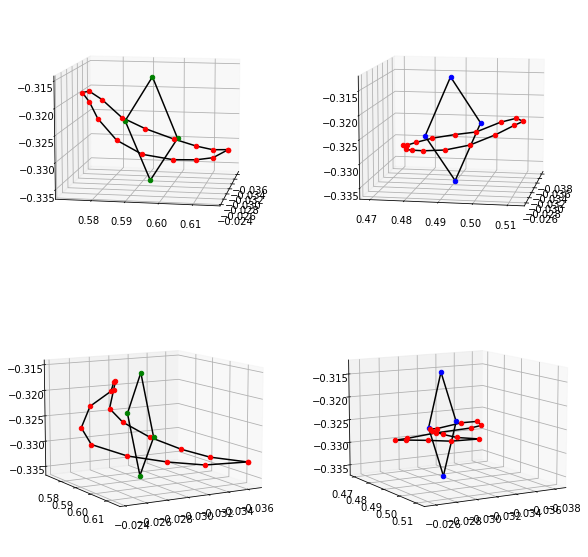

In [20]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2,2,1,projection='3d')
ax1.view_init(elev=10, azim=10)
ax2 = plt.subplot(2,2,2,projection='3d')
ax2.view_init(elev=10, azim=10)
ax3 = plt.subplot(2,2,3,projection='3d')
ax3.view_init(elev=10, azim=60)
ax4 = plt.subplot(2,2,4,projection='3d')
ax4.view_init(elev=10, azim=60)

plotAndConnect(lIrisCord, ax1, "green")
plotAndConnect(lEyeCord, ax1, "red")
plotAndConnect(lIrisCord, ax3, "green")
plotAndConnect(lEyeCord, ax3, "red")
plotAndConnect(rIrisCord, ax2, "blue")
plotAndConnect(rEyeCord, ax2, "red")
plotAndConnect(rIrisCord, ax4, "blue")
plotAndConnect(rEyeCord, ax4, "red")

##### Getting projection of all points onto plane of Iris

![img](./images/projection.png)

In [21]:
def projection(point, normal):
    u = np.array(point)
    x = sum(normal**2)
    dot = np.dot(u,normal)
    alpha = -dot/x
    u = u + normal*alpha
    return list(u)

In [22]:
print(rIrisCord[0])
projection(rIrisCord[0],rIrisNor)

(-0.030650494620203972, 0.49919381737709045, -0.32314378023147583)


[0.0, 0.49919381737709045, -0.32314378023147583]

In [23]:
lIrisPro = [projection(x,lIrisNor) for x in lIrisCord]
rIrisPro = [projection(x,rIrisNor) for x in rIrisCord]
lEyePro = [projection(x,lIrisNor) for x in lEyeCord]
rEyePro = [projection(x,rIrisNor) for x in rEyeCord]

##### Plotting projected points (Normal & side view)

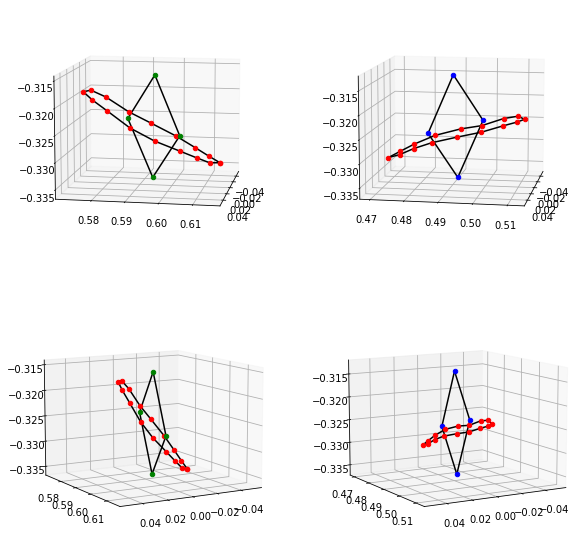

In [24]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2,2,1,projection='3d')
ax1.view_init(elev=10, azim=10)
ax2 = plt.subplot(2,2,2,projection='3d')
ax2.view_init(elev=10, azim=10)
ax3 = plt.subplot(2,2,3,projection='3d')
ax3.view_init(elev=10, azim=60)
ax4 = plt.subplot(2,2,4,projection='3d')
ax4.view_init(elev=10, azim=60)

plotAndConnect(lIrisPro, ax1, "green")
plotAndConnect(lEyePro, ax1, "red")
plotAndConnect(lIrisPro, ax3, "green")
plotAndConnect(lEyePro, ax3, "red")
plotAndConnect(rIrisPro, ax2, "blue")
plotAndConnect(rEyePro, ax2, "red")
plotAndConnect(rIrisPro, ax4, "blue")
plotAndConnect(rEyePro, ax4, "red")

##### Converting 3D coordinates to 2D coordinates

![img](./images/3Dto2D.png)

In [25]:
def convert3Dto2D(point,normal):
    # normalising normal vector
    modN = sum(map(lambda x: x**2,normal))**0.5
    normal = tuple(map(lambda x: x/ modN, normal))
    
    # calculating z rotation matrix
    modNxy = (normal[0]**2 + normal[1]**2)**0.5
    rz = [
        [normal[0]/modNxy, normal[1]/modNxy, 0],
        [-normal[1]/modNxy, normal[0]/modNxy, 0],
        [0, 0, 1]
    ]
    
    # calculating y rotation matrix
    normal1 = np.dot(rz,normal)
    ry = [
        [normal1[2], 0, -normal1[0]],
        [0, 1 ,0],
        [normal1[0], 0, normal1[2]]
    ]
    
    # calculating x rotation matrix (-90 degree)
    rx = [
        [0, 1],
        [-1, 0]
    ]
    
    # applying rotations
    return np.dot(rx,np.dot(ry,np.dot(rz,point))[:-1])

In [26]:
lIrisPro2D = [convert3Dto2D(point,lIrisNor) for point in lIrisPro]
rIrisPro2D = [convert3Dto2D(point,rIrisNor) for point in rIrisPro]
lEyePro2D = [convert3Dto2D(point,lIrisNor) for point in lEyePro]
rEyePro2D = [convert3Dto2D(point,rIrisNor) for point in rEyePro]

##### Plotting projected points on 2D plane

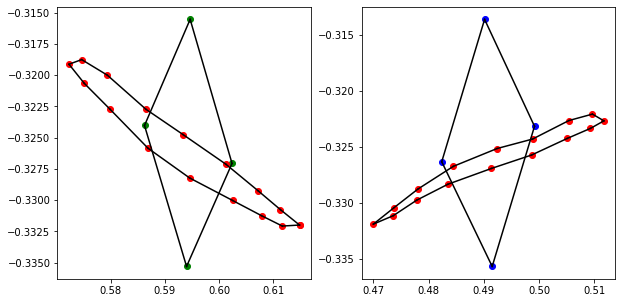

In [27]:
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

plotAndConnect(lIrisPro2D, ax1, "green", True)
plotAndConnect(lEyePro2D, ax1, "red", True)
plotAndConnect(rIrisPro2D, ax2, "blue", True)
plotAndConnect(rEyePro2D, ax2, "red", True)

##### Calculating Area Visibility of Iris

![img](./images/closure.png)

In [28]:
def getVisibility(iris, eye):
    try:
        irisPolygon = Polygon(iris)
        eyePolygon = Polygon(eye)
        intersection = irisPolygon.intersection(eyePolygon)
        return intersection.area / irisPolygon.area *100
    except:
        return 0

In [29]:
print(getVisibility(lIrisPro2D,lEyePro2D),getVisibility(rIrisPro2D,rEyePro2D))

26.21593949483104 11.468708349451862


# Mouth Open Ratio

In [30]:
lipsIdx = [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95]

In [31]:
lipsCord = [(-points[idx].z, points[idx].x, -points[idx].y) for idx in lipsIdx]

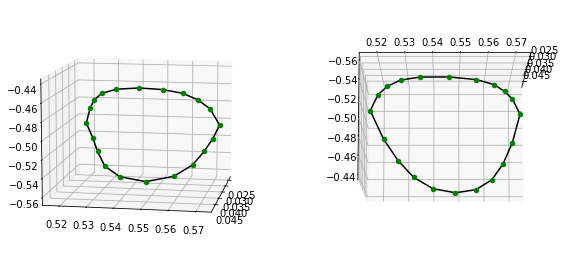

In [32]:
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.view_init(elev=10, azim=10)
ax2 = plt.subplot(1,2,2,projection='3d')
ax2.view_init(elev=170, azim=-0)

plotAndConnect(lipsCord, ax1, "green")
plotAndConnect(lipsCord, ax2, "green")

In [33]:
leftP = np.array((-points[78].z, points[78].x, -points[78].y))
rightP = np.array((-points[308].z, points[308].x, -points[308].y))
topP = np.array((-points[13].z, points[13].x, -points[13].y))
bottomP = np.array((-points[14].z, points[14].x, -points[14].y))

In [34]:
def calculateRatio(leftP, rightP, topP, bottomP):
    horizontal = sum((rightP-leftP)**2)**0.5
    vertical = sum((topP-bottomP)**2)**0.5
    return vertical/horizontal

In [35]:
calculateRatio(leftP, rightP, topP, bottomP)

2.175883703979284